<a href="https://colab.research.google.com/github/balamurugan-palaniappan-CEP/AIML_CEP_2021/blob/main/Perceptron/Perceptron_TA_session_Nov_20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.utils import shuffle

In [ ]:
#Following packages used for animation
import matplotlib.animation as animation 
from IPython.display import HTML

##Generic Perceptron learning algorithm 

In [ ]:
#training algorithm for perceptron
#input argument: initial weight vector, data set feature matrix X, data set label vector Y, max epochs
#outputs: final weight vector obtained after training, list of points where update happened, weights obtained after each update
def perceptron_train(initial_w, X, Y, max_epochs): 
  weights_updates = []
  points_updates = []

  epoch = 0
  num_updates_in_each_epoch = 0 

  w = initial_w
  #Perceptron algorithm
  while epoch<max_epochs:
    num_updates_in_each_epoch = 0
    X, Y = shuffle(X, Y) #shuffling data is useful to prevent any particular ordering in data affecting the performance
    for x,y in zip(X,Y):
      if y*np.dot(x,w)<0:
        w = w+y*x
        weights_updates.append(w)
        points_updates.append(x)
        num_updates_in_each_epoch += 1
    epoch+=1 #one epoch denotes one full pass over the data 
    print('After {0} epochs, num updates in this epoch={1}, total updates={2}'.format(epoch,num_updates_in_each_epoch,len(weights_updates)))
  print('Perceptron algo complete! Weights updated', len(weights_updates), 'no. of times')
  return w, weights_updates, points_updates

#Linearly-Separable Data

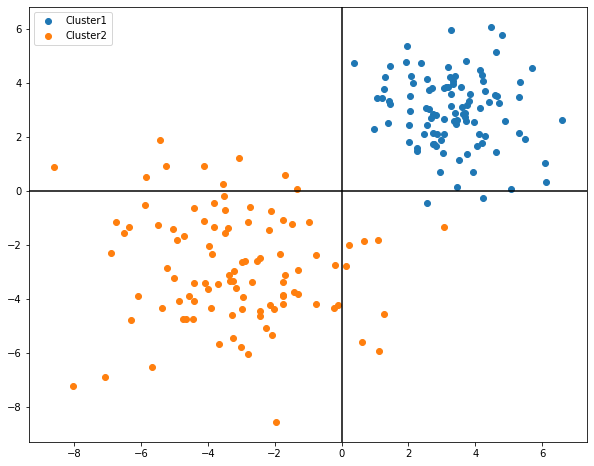

In [ ]:
#prepare the data set 
n = 100 #no. of points
np.random.seed(1) #seeding the random number generator is useful for reproducibility

#generate data points for cluster 1 from a Gaussian distribution
mean1 = [3,3]
cov1 = [[2,0],[0,2]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n)

#generating data points for cluster 2  from another Gaussian distribution
mean2 = [-3,-3]
cov2 = [[4,0],[0,4]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n)

#generating target values for both clusters
cl1_y = np.ones(n) #cluster one is labeled +1
cl2_y = -cl1_y    #cluster two is labeled -1

#forming a dataset containing both clusters
X = np.concatenate((cluster1,cluster2), axis=0) 
Y = np.concatenate((cl1_y,cl2_y), axis=0)

#Ploting clusters
cl1_x1, cl1_x2 = cluster1.T
cl2_x1, cl2_x2 = cluster2.T

plt.figure(figsize=(10, 8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend(loc=2)
plt.show()

## Perceptron Without Threshold

In [ ]:
#Initializing weights 
np.random.seed(1000)
initial_w = np.random.rand(2) 

size = len(Y)
updates = []
points = []

epoch = 0

#set max epochs to train perceptron
max_epochs = 10
num_updates_in_each_epoch = 0

#Call perceptron training algorithm and obtain the weight vector, weights obtained during updates and the data points causing updates
w,weights,points = perceptron_train(initial_w,X,Y,max_epochs)


After 1 epochs, num updates in this epoch=3, total updates=3
After 2 epochs, num updates in this epoch=1, total updates=4
After 3 epochs, num updates in this epoch=2, total updates=6
After 4 epochs, num updates in this epoch=2, total updates=8
After 5 epochs, num updates in this epoch=1, total updates=9
After 6 epochs, num updates in this epoch=2, total updates=11
After 7 epochs, num updates in this epoch=1, total updates=12
After 8 epochs, num updates in this epoch=2, total updates=14
After 9 epochs, num updates in this epoch=2, total updates=16
After 10 epochs, num updates in this epoch=0, total updates=16
Perceptron algo complete! Weights updated 16 no. of times


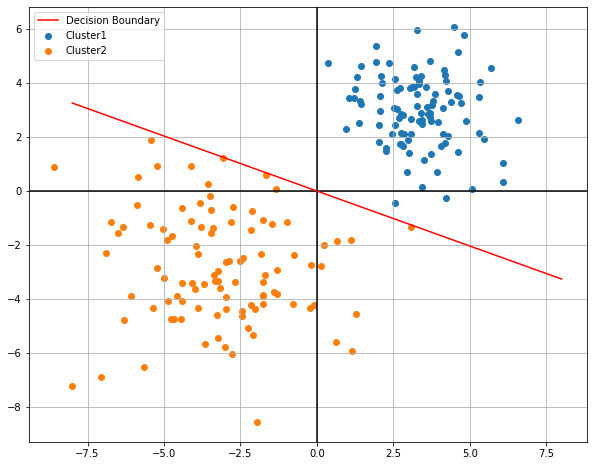

In [ ]:
#plotting decision boundary
plt.figure(figsize=(10, 8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

x1 = np.linspace(-8,8,100)
x2 = -(w[0]/w[1])*x1

plt.plot(x1, x2, '-r', label='Decision Boundary')
plt.legend(loc=2)
plt.grid()
plt.show()

###Animation

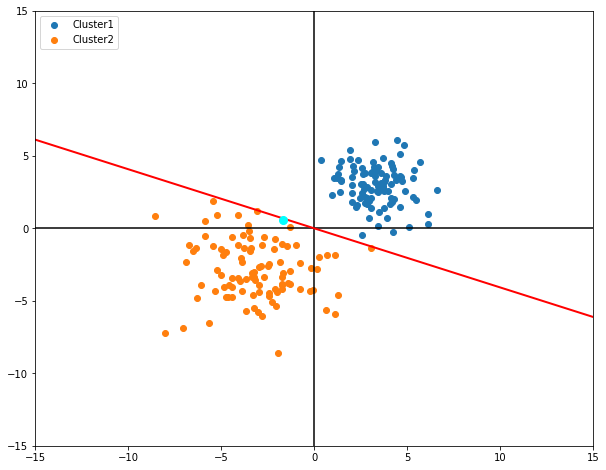

In [ ]:
fig = plt.figure(figsize=(10,8)) #windo showing clusters for the animation
axis = plt.axes(xlim = (-15,15), ylim = (-15,15))
axis.scatter(cl1_x1, cl1_x2, label='Cluster1')
axis.scatter(cl2_x1, cl2_x2, label='Cluster2')
axis.axvline(x=0, color='black')
axis.axhline(y=0, color='black')
axis.legend(loc=2)

line, = axis.plot([], [], lw = 2, color = "red")
point, = axis.plot([], [], marker='o', markersize=8, color = "cyan")

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

#animation function
def animate(i):
  w = weights[i]
  x1data = np.linspace(-15,15,100)
  x2data = -(w[0]/w[1])*x1data
  x1, x2 = points[i]
  point.set_data([x1],[x2])
  line.set_data(x1data, x2data)
  return line, point

#calling the animation function
anim1 = animation.FuncAnimation(fig, animate, init_func = init , frames = len(weights), interval = 1000, blit = True)

HTML(anim1.to_html5_video())

##Perceptron With Threshold

In [ ]:
#training of perceptron with threshold 
#modifying x to account for bias
ones = np.ones((200, 1))
X_ = np.concatenate((X,ones), axis = 1)

#initializing weights
np.random.seed(10)
initial_w_ = np.random.rand(3)

size_ = len(Y)
updates_ = []
points_ = []

epoch_ = 0

max_epochs_ = 6
max_updates_in_each_epoch_ = 0

w_,weights_,points_ = perceptron_train(initial_w_,X_,Y,max_epochs_)

After 1 epochs, num updates in this epoch=3, total updates=3
After 2 epochs, num updates in this epoch=1, total updates=4
After 3 epochs, num updates in this epoch=2, total updates=6
After 4 epochs, num updates in this epoch=1, total updates=7
After 5 epochs, num updates in this epoch=1, total updates=8
After 6 epochs, num updates in this epoch=0, total updates=8
Perceptron algo complete! Weights updated 8 no. of times


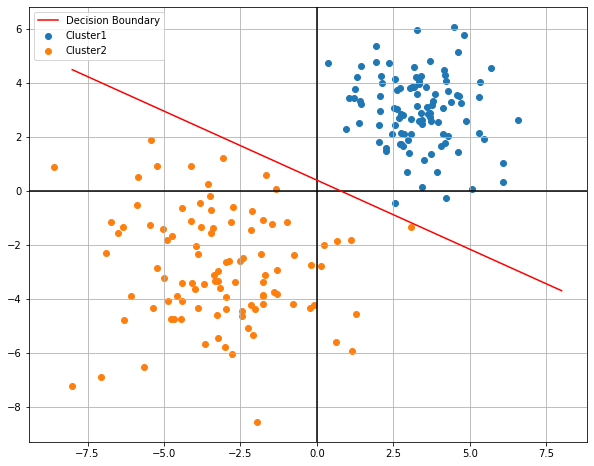

In [ ]:
#Write code to plot the decision boundary for perceptron with threshold
plt.figure(figsize=(10, 8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')

x1 = np.linspace(-8,8,100)
x2 = -(w_[0]/w_[1])*x1 - (w_[2]/w_[1])

plt.plot(x1, x2, '-r', label='Decision Boundary')
plt.legend(loc=2)
plt.grid()
plt.show()

###Animation

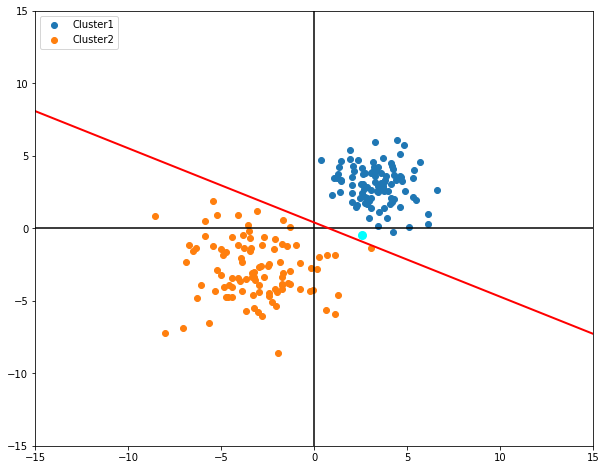

In [ ]:
fig = plt.figure(figsize=(10,8)) #windo showing clusters for the animation
axis = plt.axes(xlim = (-15,15), ylim = (-15,15))
axis.scatter(cl1_x1, cl1_x2, label='Cluster1')
axis.scatter(cl2_x1, cl2_x2, label='Cluster2')
axis.axvline(x=0, color='black')
axis.axhline(y=0, color='black')
axis.legend(loc=2)

line, = axis.plot([], [], lw = 2, color = "red")
point, = axis.plot([], [], marker='o', markersize=8, color = "cyan")

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

#animation function
def animate(i):
  w = weights_[i]
  x1data = np.linspace(-15,15,100)
  x2data = -(w[0]/w[1])*x1data - (w[2]/w[1])
  x1, x2 = points_[i][:2]
  point.set_data([x1],[x2])
  line.set_data(x1data, x2data)
  return line, point

#calling the animation function
anim1 = animation.FuncAnimation(fig, animate, init_func = init , frames = len(weights_), interval = 1000, blit = True)

HTML(anim1.to_html5_video())

#Non-Separable Data

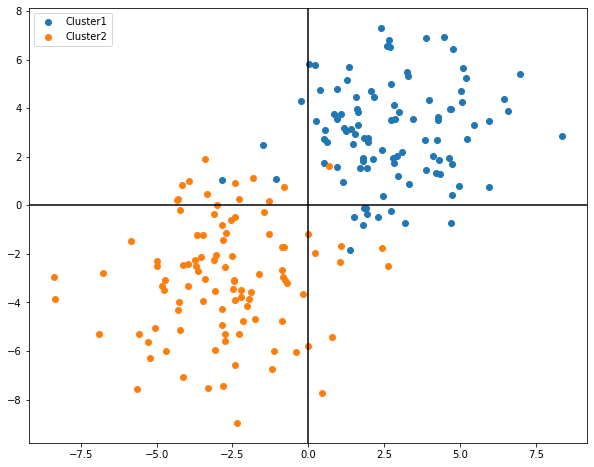

In [ ]:
n = 100 #no. of points
np.random.seed(3)

#generate data points for cluster 1 from a Gaussian distribution
mean1 = [3,3]
cov1 = [[4,0],[0,4]]
cluster1 = np.random.multivariate_normal(mean1, cov1, n)

#generating data points for cluster 2  from another Gaussian distribution
mean2 = [-3,-3]
cov2 = [[4,0],[0,4]]
cluster2 = np.random.multivariate_normal(mean2, cov2, n)

#generating target values for both clusters
cl1_y = np.ones(n) #cluster one is labeled +1
cl2_y = -cl1_y    #cluster two is labeled -1

#forming a dataset containing both clusters
X = np.concatenate((cluster1,cluster2), axis=0) 
Y = np.concatenate((cl1_y,cl2_y), axis=0)

#Ploting clusters
cl1_x1, cl1_x2 = cluster1.T
cl2_x1, cl2_x2 = cluster2.T

plt.figure(figsize=(10, 8))
plt.scatter(cl1_x1, cl1_x2, label='Cluster1')
plt.scatter(cl2_x1, cl2_x2, label='Cluster2')
plt.axvline(x=0, color='black')
plt.axhline(y=0, color='black')
plt.legend(loc=2)
plt.show()



##Perceptron With Threshold

In [ ]:
##training of perceptron with threshold 
#modifying x to account for bias
ones = np.ones((200, 1))
X_ = np.concatenate((X,ones), axis = 1)

#initializing weights
np.random.seed(3)
initial_w_ = np.random.rand(3)

size_ = len(Y)
updates_ = []
points_ = []

epoch_ = 0

max_epochs_ = 50
max_updates_in_each_epoch_ = 0

w_,weights_,points_ = perceptron_train(initial_w_,X_,Y,max_epochs_)

After 1 epochs, num updates in this epoch=8, total updates=8
After 2 epochs, num updates in this epoch=7, total updates=15
After 3 epochs, num updates in this epoch=7, total updates=22
After 4 epochs, num updates in this epoch=9, total updates=31
After 5 epochs, num updates in this epoch=7, total updates=38
After 6 epochs, num updates in this epoch=8, total updates=46
After 7 epochs, num updates in this epoch=6, total updates=52
After 8 epochs, num updates in this epoch=9, total updates=61
After 9 epochs, num updates in this epoch=6, total updates=67
After 10 epochs, num updates in this epoch=8, total updates=75
After 11 epochs, num updates in this epoch=7, total updates=82
After 12 epochs, num updates in this epoch=6, total updates=88
After 13 epochs, num updates in this epoch=7, total updates=95
After 14 epochs, num updates in this epoch=8, total updates=103
After 15 epochs, num updates in this epoch=11, total updates=114
After 16 epochs, num updates in this epoch=9, total updates=12

###Animation

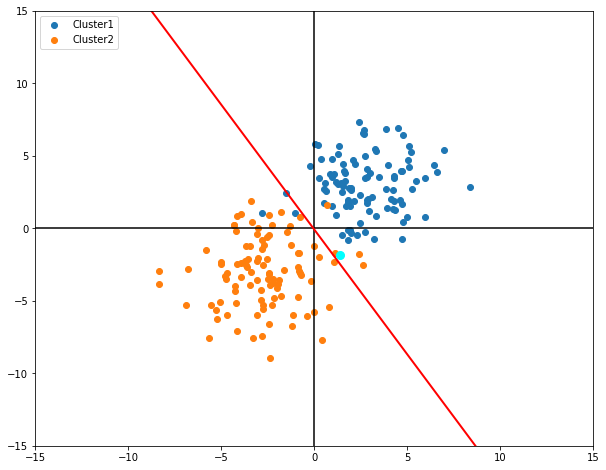

In [ ]:
fig = plt.figure(figsize=(10,8)) #windo showing clusters for the animation
axis = plt.axes(xlim = (-15,15), ylim = (-15,15))
axis.scatter(cl1_x1, cl1_x2, label='Cluster1')
axis.scatter(cl2_x1, cl2_x2, label='Cluster2')
axis.axvline(x=0, color='black')
axis.axhline(y=0, color='black')
axis.legend(loc=2)

line, = axis.plot([], [], lw = 2, color = "red")
point, = axis.plot([], [], marker='o', markersize=8, color = "cyan")

def init():
  line.set_data([], [])
  point.set_data([], [])
  return line, point

#animation function
def animate(i):
  w = weights_[i]
  x1data = np.linspace(-15,15,100)
  x2data = -(w[0]/w[1])*x1data - (w[2]/w[1])
  x1, x2 = points_[i][:2]
  point.set_data([x1],[x2])
  line.set_data(x1data, x2data)
  return line, point

#calling the animation function
anim1 = animation.FuncAnimation(fig, animate, init_func = init , frames = len(weights_), interval = 1000, blit = True)

HTML(anim1.to_html5_video())